# customer clustering

In [1]:

#importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
#loading the data
data = pd.read_csv('Customer Data.csv')

In [3]:
#checking the first five rows
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
#dropping the ID column
data = data.drop('ID', axis=1)

In [5]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


<AxesSubplot:xlabel='Marital status', ylabel='Age'>

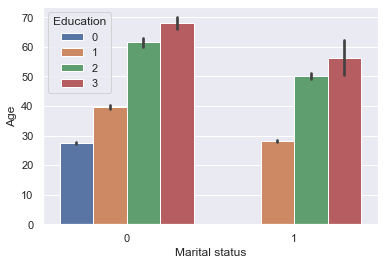

In [6]:
sns.barplot(data=data, x='Marital status', y='Age', hue='Education')

In [8]:
#checking the correllation between the variables
data.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


In [12]:
#checking for null values
data.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

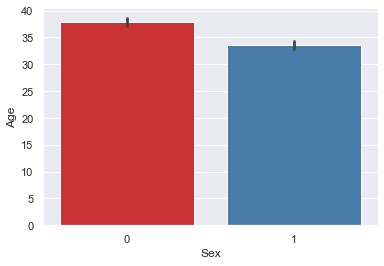

In [10]:
#Age and Sex barplot
sns.barplot(data=data, y='Age', x='Sex', palette='Set1')

# K-Means Clustering

In [13]:
#importing standard Scaler
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaled_x = scaler.fit_transform(data)

In [16]:
from sklearn.cluster import KMeans

In [17]:
wcss= []

for n in range(2, 10):
    
    model = KMeans(n_clusters=n)
    labels = model.fit_predict(data)
    
    wcss.append(model.inertia_)

Text(0, 0.5, 'wcss')

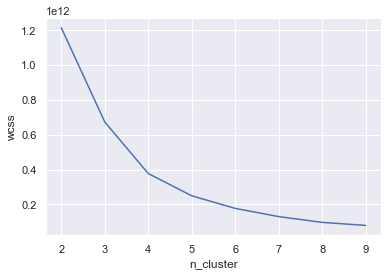

In [18]:
#plotting
plt.plot(range(2, 10), wcss)
plt.xlabel('n_cluster')
plt.ylabel('wcss')

In [19]:
model = KMeans(n_clusters=4)
labels = model.fit_predict(scaled_x)

In [20]:
model.labels_

array([3, 1, 0, ..., 0, 1, 0])

<AxesSubplot:xlabel='Marital status', ylabel='Age'>

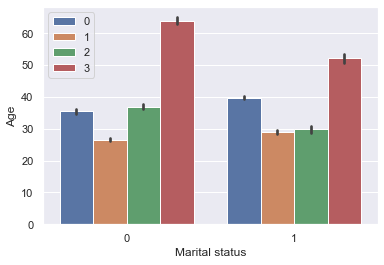

In [21]:
sns.barplot(data=data, y='Age', x='Marital status', hue=labels)

In [22]:
data.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

<AxesSubplot:xlabel='Settlement size', ylabel='Age'>

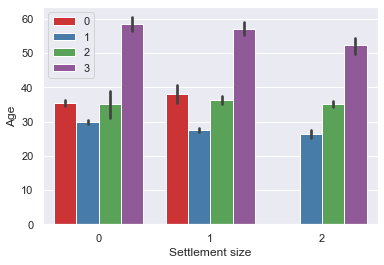

In [23]:
sns.barplot(data=data, x='Settlement size', y='Age', hue=labels, palette='Set1')

# Hierarchical Clustering

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaled_x = scaler.fit_transform(data)

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [29]:
labels = model.fit_predict(scaled_x)

In [30]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [31]:
linkage_matrix = hierarchy.linkage(model.children_)

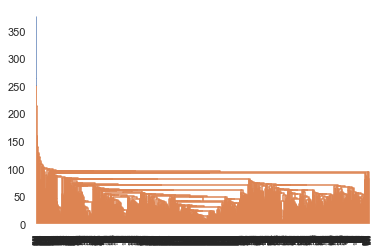

In [32]:
dn = hierarchy.dendrogram(linkage_matrix)

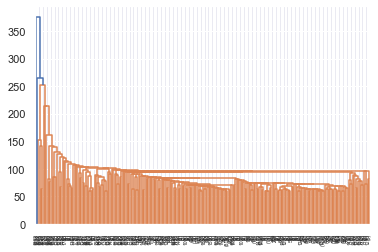

In [33]:
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='lastp', p=250)

# DBSCAN

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
scaled_x = scaler.fit_transform(data)

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
no_of_outliers = []

for eps in np.linspace(0.001, 10, 100):
    
    dbscan = DBSCAN(eps=eps)
    dbscan.fit_predict(scaled_x)
    
    print(dbscan.labels_)
    
    no_of_outliers.append(np.sum(dbscan.labels_==-1))

[-1 -1 -1 ... -1 -1 -1]
[ 0  1  2 ... 18  8 18]
[ 0  1  2 ... 19  8 19]
[ 0  1  2 ... 20  8 20]
[0 1 2 ... 2 8 2]
[0 1 0 ... 0 1 0]
[0 1 0 ... 0 1 0]
[0 1 0 ... 0 1 0]
[0 1 0 ... 0 1 0]
[0 1 0 ... 0 1 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0

(0.0, 1.5)

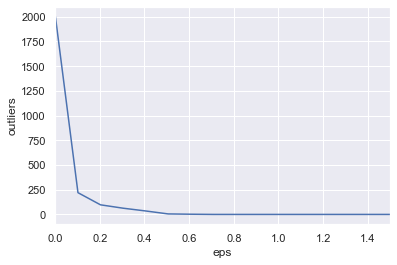

In [39]:
plt.plot(np.linspace(0.001, 10, 100), no_of_outliers)
plt.xlabel('eps')
plt.ylabel('outliers')
plt.xlim(0,1.5)

In [40]:
no_of_outliers = []

for min_samples in range(2, 10):
    
    dbscan = DBSCAN(min_samples=min_samples)
    dbscan.fit_predict(scaled_x)
    
    no_of_outliers.append(np.sum(dbscan.labels_==-1))

In [41]:
dbscan.labels_

array([0, 1, 2, ..., 2, 7, 2], dtype=int64)

Text(0, 0.5, 'outliers')

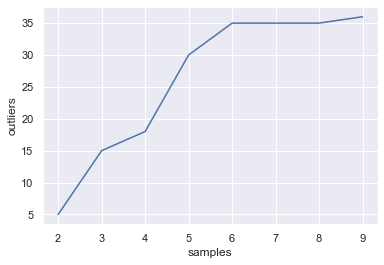

In [42]:
plt.plot(range(2, 10), no_of_outliers)
plt.xlabel('samples')
plt.ylabel('outliers')

In [43]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_x)

In [44]:
scaled_x

array([[0.        , 0.        , 0.84482759, ..., 0.32478101, 0.5       ,
        1.        ],
       [1.        , 1.        , 0.06896552, ..., 0.42021043, 0.5       ,
        1.        ],
       [0.        , 0.        , 0.53448276, ..., 0.19514353, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.22413793, ..., 0.18487051, 0.        ,
        0.        ],
       [1.        , 1.        , 0.10344828, ..., 0.22716172, 0.        ,
        0.        ],
       [0.        , 0.        , 0.12068966, ..., 0.11912317, 0.        ,
        0.        ]])

<AxesSubplot:xlabel='Marital status', ylabel='Age'>

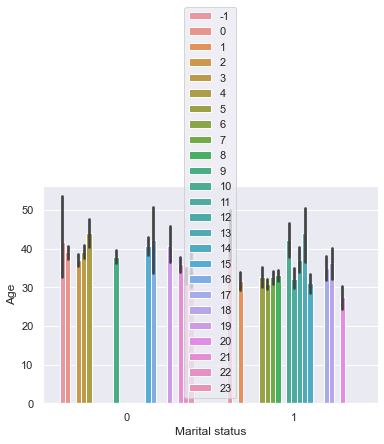

In [45]:
sns.barplot(data=data, y='Age', x='Marital status', hue=labels)